In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from analysis import Analysis
import math
from collections import defaultdict
import matplotlib.pyplot as plt
from training import exponential_decay

# Repetitions

In [3]:
# BIRDS = "great tit", "robin", "chaff", "bull", "blue", "nuthatch", "gold"
BIRDS = "great tit", "robin", "chaff", "nuthatch", "gold"
EPOCHS = 1
learning_rate_fn = exponential_decay(1e-2, 0.0006461081889226677, epochs=EPOCHS)
stats = defaultdict(list)

In [ ]:
for i in range(5):
    a = Analysis(birds=BIRDS, epochs=EPOCHS, learning_rate_function=learning_rate_fn, class_limit=300)
    new_stats = a.run()
    stats["accuracy"].append(new_stats["accuracy"])
    stats["val_accuracy"].append(new_stats["val_accuracy"])

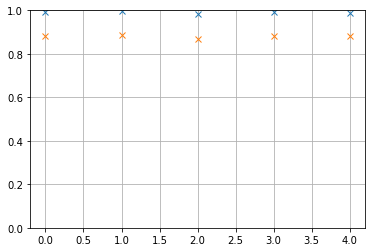

In [19]:
plt.plot(stats["accuracy"], 'x')
plt.plot(stats["val_accuracy"], 'x')
plt.ylim((0, 1))
plt.grid()
plt.show()

# Number of classes

In [3]:
BIRDS = "great tit", "robin", "chaff", "bull", "blue", "nuthatch", "gold"
EPOCHS = 80
learning_rate_fn = exponential_decay(1e-2, 0.0006461081889226677, epochs=EPOCHS)
stats = defaultdict(list)

In [ ]:
for i in range(1, len(BIRDS)):
    birds = BIRDS[:i+1]
    a = Analysis(birds=birds, epochs=EPOCHS, learning_rate_function=learning_rate_fn, class_limit=300)
    new_stats = a.run()
    stats["accuracy"].append(new_stats["accuracy"])
    stats["val_accuracy"].append(new_stats["val_accuracy"])

[2, 3, 4, 5, 6, 7]


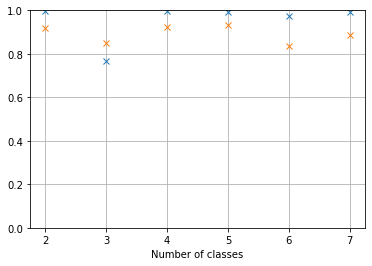

In [9]:
number_of_classes = [i+1 for i in range(1, len(BIRDS))]
print(number_of_classes)
plt.plot(number_of_classes, stats["accuracy"], 'x')
plt.plot(number_of_classes, stats["val_accuracy"], 'x')
plt.ylim((0, 1))
plt.xlabel("Number of classes")
plt.grid()
plt.show()

# Number of training images

In [4]:
NUM_VALIDATION_IMAGES = 500
max_train_images = len(BIRDS) * 300 - NUM_VALIDATION_IMAGES
validation_split = NUM_VALIDATION_IMAGES / max_train_images
train_step = 30

In [ ]:
for num_train_images in range(max_train_images, train_step, -train_step):
    total = num_train_images + NUM_VALIDATION_IMAGES
    validation_split = NUM_VALIDATION_IMAGES / total
    total_per_class = int(total / len(BIRDS))
    print(f"{validation_split=}\n{total=}\n")
    a = Analysis(birds=BIRDS, image_size=(120, 120), epochs=100, learning_rate_function=step_decay, class_limit=total_per_class, 
                 validation_split=validation_split)
    new_stats = a.run()
    stats["accuracy"].append(new_stats["accuracy"])
    stats["val_accuracy"].append(new_stats["val_accuracy"])

In [ ]:
stats